In [203]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [204]:
g = nx.Graph([(1,4), (4,5), (4,2), (4,6), (2,3), (3,5), (6,7), (7,5), (5,8), (8,9), (9, 10), (8, 10), (10, 11), (11,12)])

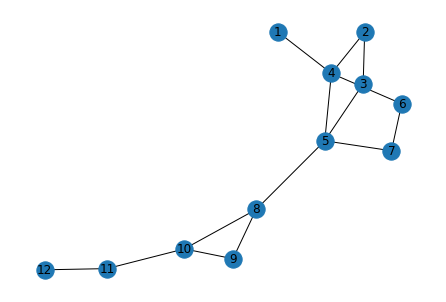

In [205]:
nx.draw(g, with_labels = True)
plt.show()

In [206]:
cycles_g = nx.cycle_basis(g)

In [207]:
cycles_g

[[5, 7, 6, 4], [5, 3, 2, 4], [9, 10, 8]]

In [208]:
induceds = [ nx.induced_subgraph(g, induced) for induced in cycles_g ]
induceds

[(4, 5), (4, 6), (5, 7), (6, 7)]


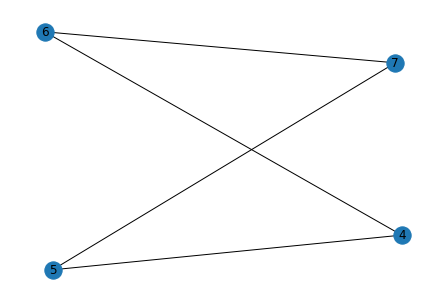

[(2, 4), (2, 3), (3, 5), (4, 5)]


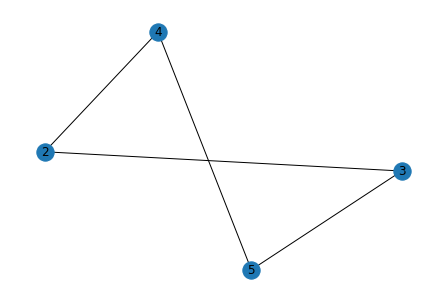

[(8, 9), (8, 10), (9, 10)]


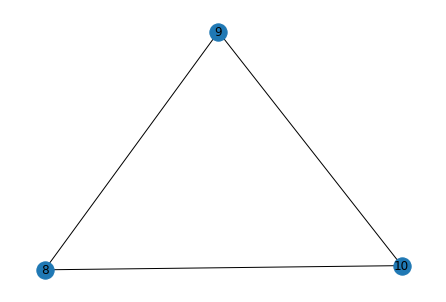

In [209]:
induced_edges = list()
for induced in induceds:
    induced_edges += list(induced.edges())
    print(induced.edges())
    nx.draw(induced, with_labels = True)
    plt.show()

In [210]:
copy_g = copy.deepcopy(g)
copy_g.edges()

EdgeView([(1, 4), (4, 5), (4, 2), (4, 6), (5, 3), (5, 7), (5, 8), (2, 3), (6, 7), (8, 9), (8, 10), (9, 10), (10, 11), (11, 12)])

In [211]:
print(g.edges())
print(induced_edges)

[(1, 4), (4, 5), (4, 2), (4, 6), (5, 3), (5, 7), (5, 8), (2, 3), (6, 7), (8, 9), (8, 10), (9, 10), (10, 11), (11, 12)]
[(4, 5), (4, 6), (5, 7), (6, 7), (2, 4), (2, 3), (3, 5), (4, 5), (8, 9), (8, 10), (9, 10)]


In [212]:
copy_g.remove_edges_from(induced_edges)
copy_g.remove_nodes_from(list(nx.isolates(copy_g)))

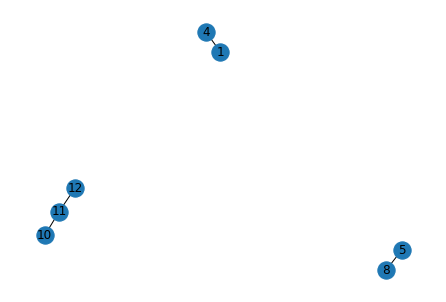

In [213]:
nx.draw(copy_g, with_labels = True)

In [216]:
g.remove_edges_from(copy_g.edges())
g.remove_nodes_from( list(nx.isolates(g)) )

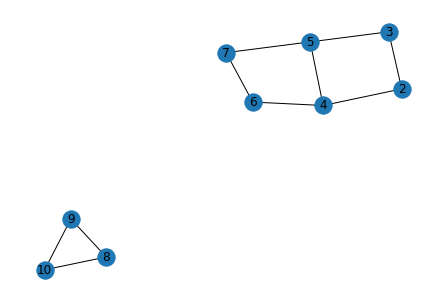

In [217]:
nx.draw(g, with_labels = True)

In [220]:
graphs = [g.subgraph(c).copy() for c in nx.connected_components(g)] + [copy_g.subgraph(c).copy() for c in nx.connected_components(copy_g)]
graphs

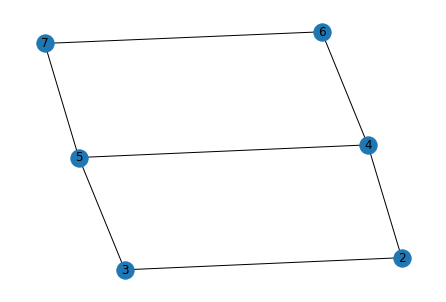

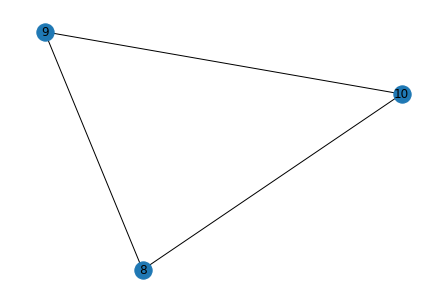

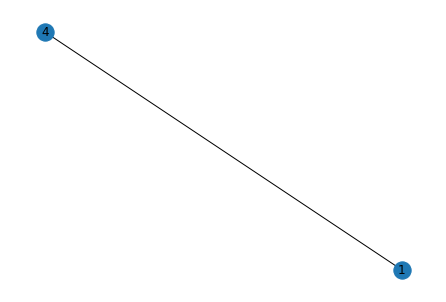

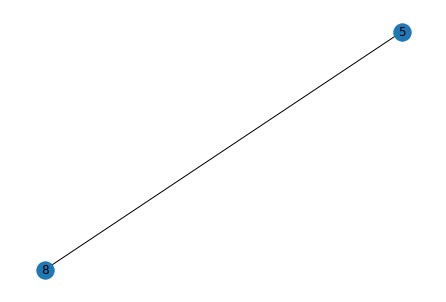

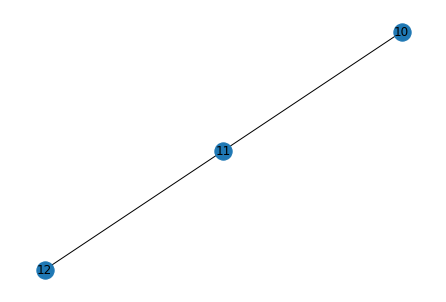

In [230]:
for graph in graphs:
    nx.draw(graph, with_labels = True)
    plt.show()